In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import IncrementalPCA, PCA

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [2]:

dt_heart = pd.read_csv('../data/heart.csv')
dt_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
dt_features = dt_heart.drop('target', axis=1)
dt_target = dt_heart.target

dt_features = StandardScaler().fit_transform(dt_features)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, random_state=11)
X_train[:5], y_train[:5]

(array([[ 1.05491812,  0.66150409,  1.02761788, -0.37763552,  1.22170358,
         -0.41887792,  0.89125488, -0.78776   ,  1.40392824,  0.62026416,
         -0.6241209 , -0.73197147,  1.08985168],
        [ 1.16519768,  0.66150409, -0.91575542, -1.23437834,  0.03878424,
         -0.41887792, -1.00404855,  0.38643389, -0.71228712, -0.40146467,
          0.99543334,  1.20922066, -2.1340963 ],
        [-0.26843658, -1.51170646,  1.02761788,  0.25064255, -0.96960601,
         -0.41887792, -1.00404855,  0.86480918, -0.71228712, -0.82718502,
         -0.6241209 , -0.73197147, -0.52212231],
        [-0.37871614,  0.66150409,  1.02761788, -1.23437834, -1.37684054,
         -0.41887792,  0.89125488, -1.1356693 , -0.71228712, -0.40146467,
          0.99543334, -0.73197147, -0.52212231],
        [ 0.28296121,  0.66150409,  0.05593123,  1.27873394, -0.27148968,
         -0.41887792, -1.00404855,  0.64736587, -0.71228712, -0.91232909,
          0.99543334,  0.23862459, -0.52212231]]),
 586    0
 98

In [5]:
X_train.shape, y_train.shape

((768, 13), (768,))

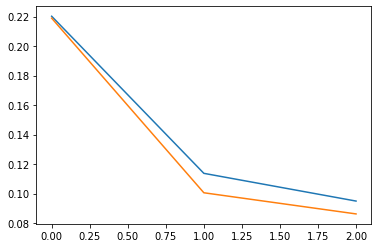

In [6]:
pca = PCA(n_components=3)
pca.fit(X_train)

ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)

plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)

plt.plot(range(len(ipca.explained_variance_)), ipca.explained_variance_ratio_)

In [7]:
logistic = LogisticRegression()

dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)

logistic.fit(dt_train, y_train)

logistic.score(dt_test, y_test)

0.8287937743190662

In [8]:
dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)

logistic.fit(dt_train, y_train)

logistic.score(dt_test, y_test)

0.8404669260700389